# 3.04.1 Display Meteo-Data

1.08.2019 to 28.08.2019 



Station: Kloten/Zürich Flughafen

Legende:

              Einheit       Beschreibung
    
    tso020s0  °C            Bodentemperatur 20 cm Tiefe; Momentanwert
    brefarz0  No            Fernblitze (Entfernung 3 - 30 km); Zehnminutensumme
    gre000z0  W/m²          Globalstrahlung; Zehnminutenmittel
    prestas0  hPa           Luftdruck auf Stationshöhe (QFE); Momentanwert
    tre200s0  °C            Lufttemperatur 2 m über Boden; Momentanwert
    rre150z0  mm            Niederschlag; Zehnminutensumme
    ure200s0  %             Relative Luftfeuchtigkeit 2 m über Boden; Momentanwert
    vhoauts0  m             Sichtweite; automatische Messung
    fkl010z0  m/s           Windgeschwindigkeit skalar; Zehnminutenmittel
    dkl010z0  °             Windrichtung; Zehnminutenmittel



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from datetime import date

def scale(a):    return (a-a.min())/(a.max()-a.min())

## Read Meteo-Data

In [3]:
def read_meteo_data(fName):
    colNames = ['Stao','time', 'T_Boden_20cm', 'Flash_30km', 'Glob_rad', 'QFE','T_2m','Rain_Sum','H_rel','visibi','V_wind','direction_wind']  
    df = pd.read_csv(fName,sep=';', skiprows=3, names=colNames, na_values='-')
    print(df.head())
    return df

fPath = '/mnt/daten/04_Schule/42_Kanti/Matrua/Music_generation/Organisation/MeteoSchweiz/Daten/'
fName = 'order_75330_data.txt'
dM = read_meteo_data(fPath+fName)

#---- Parameter bestimmen -----------
NT, MP = dM.shape
print('-----------------')
print('NT, MP', NT, MP)

  Stao          time  T_Boden_20cm  Flash_30km  Glob_rad    QFE  T_2m  \
0  KLO  201908010000          21.5           0         2  969.5  15.3   
1  KLO  201908010010          21.5           0         2  969.5  14.9   
2  KLO  201908010020          21.5           0         2  969.5  14.6   
3  KLO  201908010030          21.5           0         2  969.5  14.6   
4  KLO  201908010040          21.4           0         2  969.6  13.7   

   Rain_Sum  H_rel   visibi  V_wind  direction_wind  
0       0.0   80.4  20000.0     0.9             117  
1       0.0   82.4  20000.0     1.1              98  
2       0.0   83.7  20000.0     1.0             121  
3       0.0   82.7  20000.0     1.2             119  
4       0.0   88.8  20000.0     1.0             173  
-----------------
NT, MP 4032 12


## Parse begin and end date

In [4]:
def parse_date(A):
    yr = int(str(A)[0:4])
    mo = int(str(A)[4:6])
    dy = int(str(A)[6:8])
    hr = int(str(A)[8:10])
    mi = int(str(A)[10:12])
    return date(yr,mo,dy)
    
firstDateM = dM['time'].iloc[0]
lastDateM = dM['time'].iloc[-1]

firstDate = parse_date(firstDateM); print('firstDate', firstDate)
lastDate = parse_date(lastDateM);   print('lastDate',  lastDate)

firstDate 2019-08-01
lastDate 2019-08-28


## Plot data

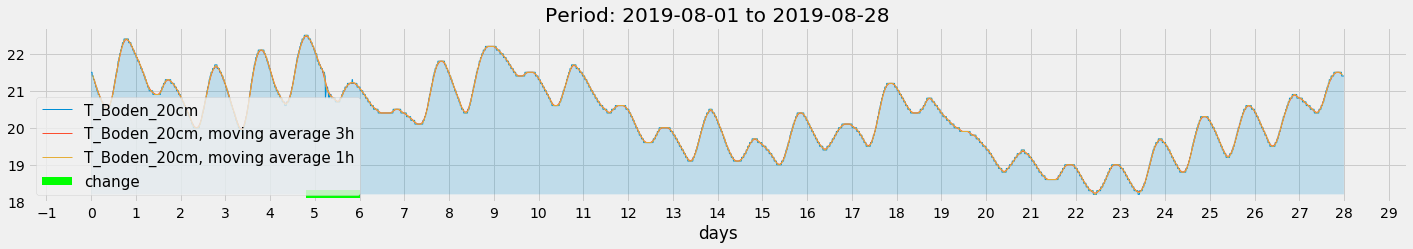

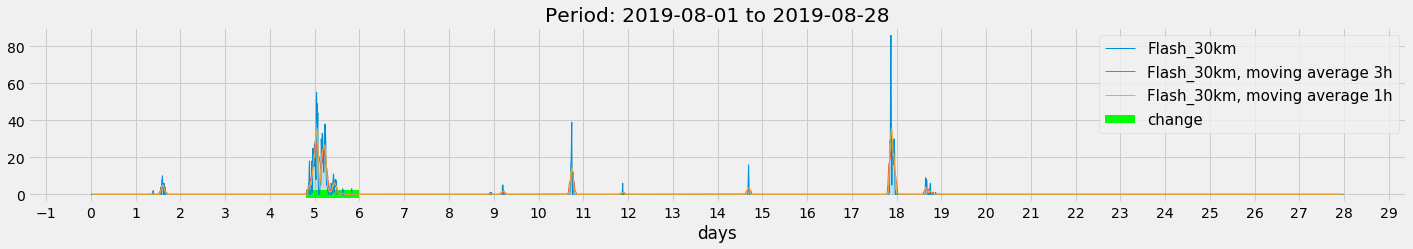

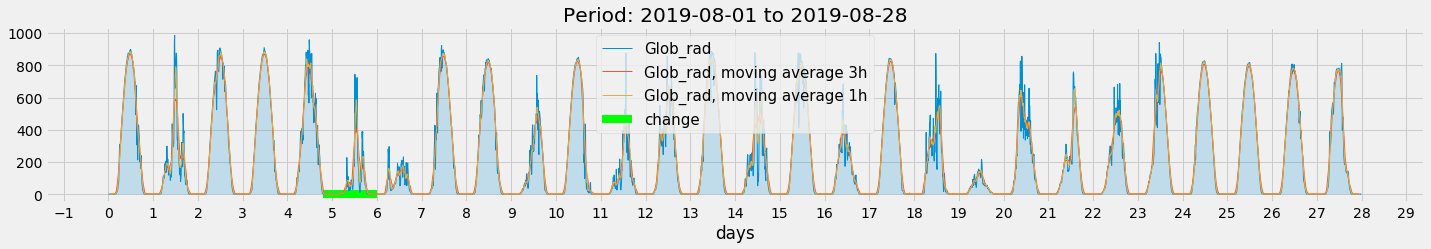

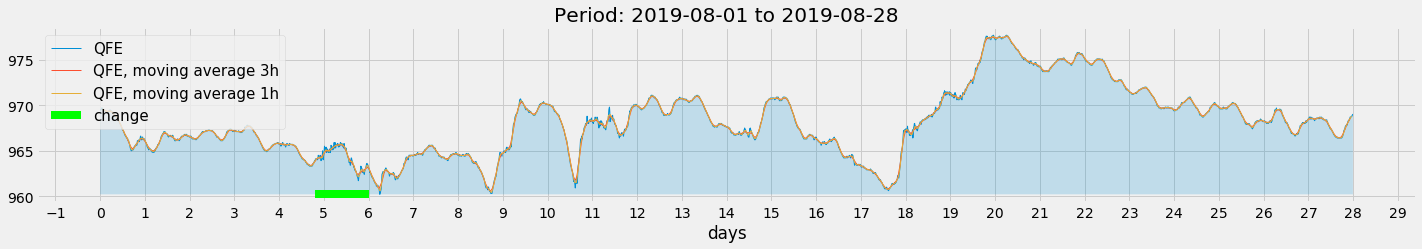

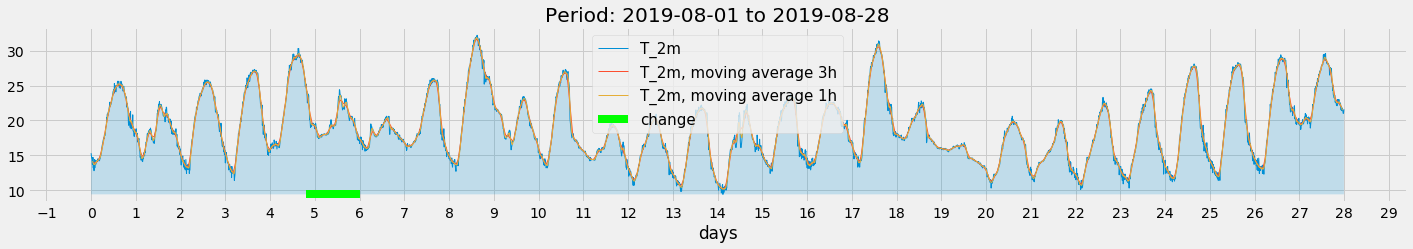

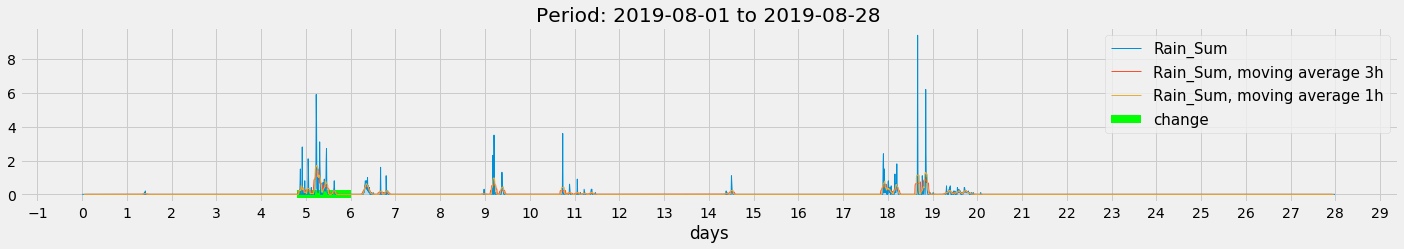

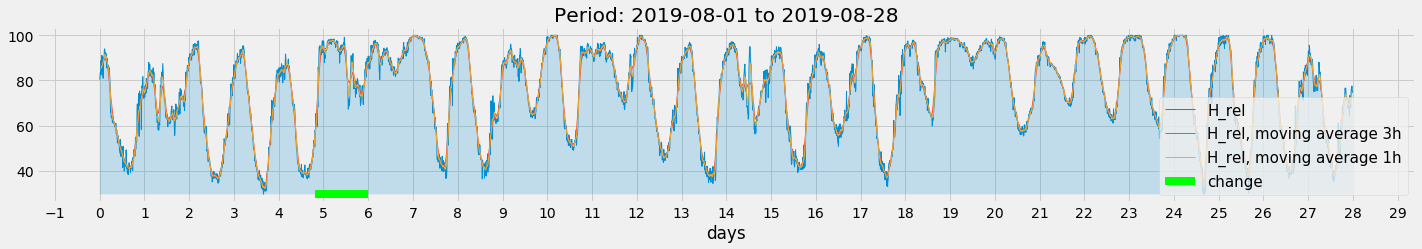

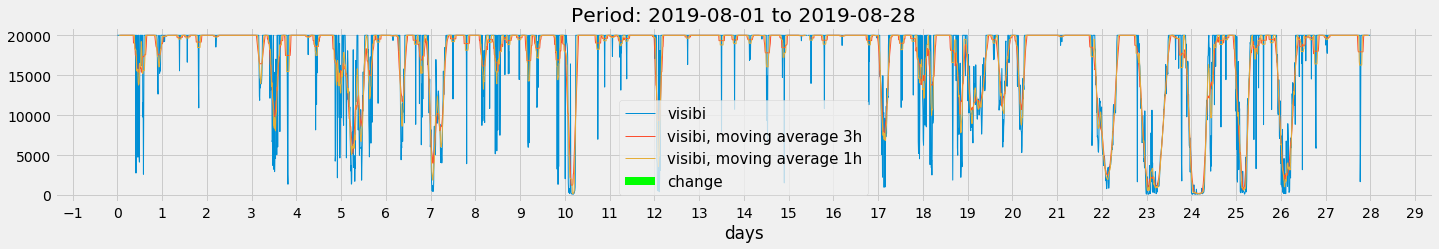

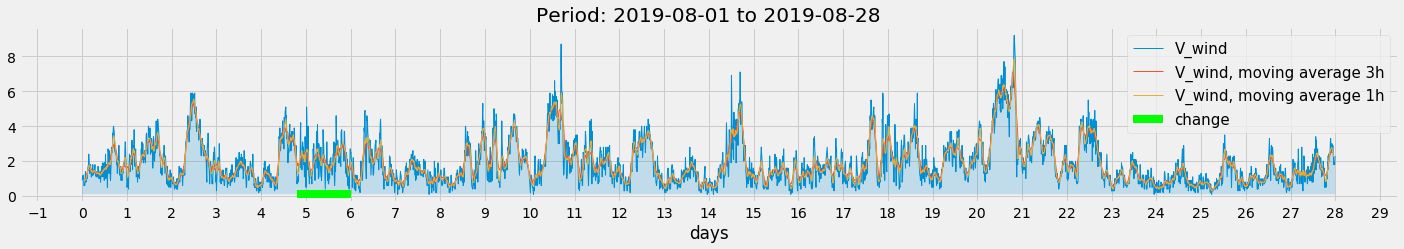

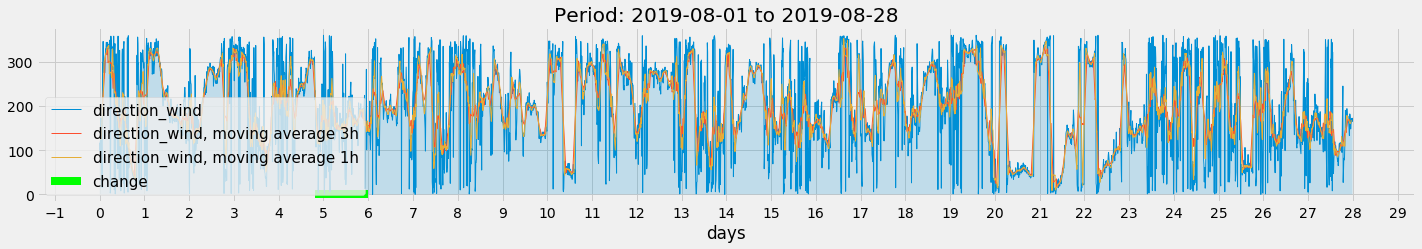

In [5]:
# ---- Parameter festlegen ----------
w3 = 18
w6 = 6
h24 = 6*24
tt = np.arange(NT)/h24  # Zeitachse in Tagen

#---- graphics ---------------------
with plt.style.context('fivethirtyeight'): 
    for k in range(2,MP,1):
        fig = plt.figure(figsize=(22,3)) 
        ax = fig.add_subplot(111)
        
        Y = np.array(dM[dM.columns[k]])
        Y3 = np.array(dM[dM.columns[k]].rolling(window=w3,center=True).mean())
        Y6 = np.array(dM[dM.columns[k]].rolling(window=w6,center=True).mean())
        
        plt.plot(tt,Y,linewidth=1.0, label=dM.columns[k])
        plt.fill_between(tt,Y,Y.min(),alpha=0.2)
        plt.plot(tt,Y3,linewidth=1.0, label=dM.columns[k]+', moving average 3h')
        plt.plot(tt,Y6,linewidth=1.0, label=dM.columns[k]+', moving average 1h')
        
        plt.hlines(Y.min(),4.8, 6, colors='lime', linewidth=8, linestyles='solid', label='change')
        
        loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
        ax.xaxis.set_major_locator(loc)
        plt.title('Period: '+str(firstDate)+' to '+str(lastDate))
        plt.xlabel('days')
        plt.legend(prop={'size':15})
        plt.show()

In [7]:
for k in range(2,MP,1):
    print(k, dM.columns[k])

2 T_Boden_20cm
3 Flash_30km
4 Glob_rad
5 QFE
6 T_2m
7 Rain_Sum
8 H_rel
9 visibi
10 V_wind
11 direction_wind
